<a href="https://colab.research.google.com/github/sreeradham/Data-Science-and-Analytics-ICT-course/blob/main/unsupervised_learnin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/sample_data/Wine_clust.csv')

In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.isna().sum()


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
data.shape

(178, 13)

In [ ]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object




kmeans clustering


In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

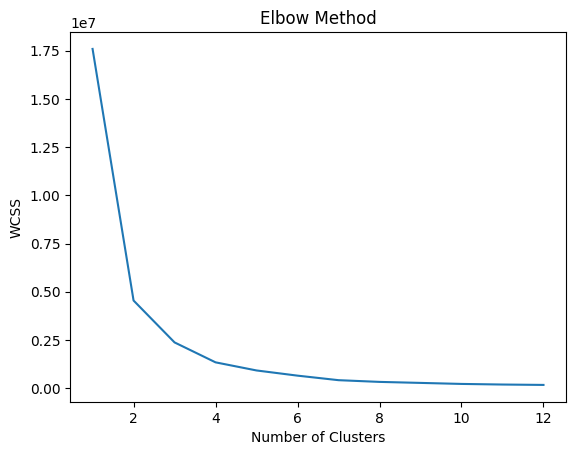

In [ ]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#elbow is 4
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(y_kmeans)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [ ]:


#silhoutte score of kmeans
from sklearn.metrics import silhouette_score
sil_avg= silhouette_score(data,y_kmeans)
print(sil_avg)

0.571138193786884


agglomerative clustering


In [ ]:
import scipy.cluster.hierarchy as sch

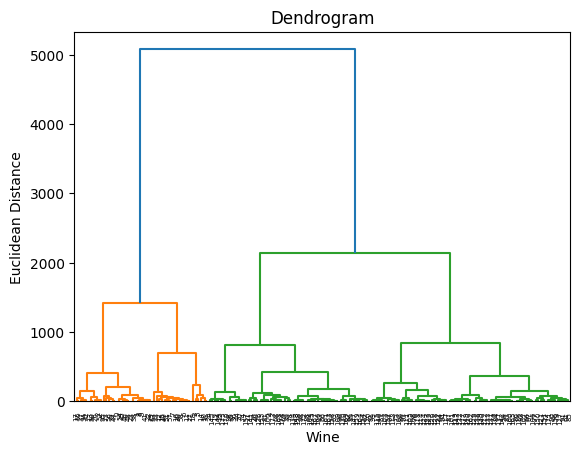

In [ ]:
dendrogram= sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#number of clusters is 2
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
sil_avg= silhouette_score(data,y_hc)
print(sil_avg)

0.6587292996216912


db-scan clustering


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=133, min_samples=1).fit(data)
labels=db.labels_

In [ ]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
n_clusters

2

In [ ]:
sc = silhouette_score(data, labels)
print("Silhouette Coefficient: ",sc)

Silhouette Coefficient:  0.5393938960075036
